In [1]:
from rikai.spark.utils import init_spark_session
from rikai.spark.functions import init

spark = init_spark_session()
init(spark)

:: loading settings :: url = jar:file:/Users/da/.pyenv/versions/3.8.10/envs/rikai-ocr/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/da/.ivy2/cache
The jars for the packages stored in: /Users/da/.ivy2/jars
ai.eto#rikai_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-a1439cb0-e3f2-4b0a-ade4-53175808bc8d;1.0
	confs: [default]
	found ai.eto#rikai_2.12;0.1.7 in central
	found org.antlr#antlr4-runtime;4.8-1 in local-m2-cache
	found com.thoughtworks.enableIf#enableif_2.12;1.1.8 in central
	found org.apache.hadoop#hadoop-common;3.2.3 in central
	found org.apache.hadoop#hadoop-annotations;3.2.3 in central
	found com.google.guava#guava;27.0-jre in spark-list
	found com.google.guava#failureaccess;1.0 in spark-list
	found com.google.guava#listenablefuture;9999.0-empty-to-avoid-conflict-with-guava in spark-list
	found com.google.code.findbugs#jsr305;3.0.2 in spark-list
	found org.checkerframework#checker-qual;2.5.2 in spark-list
	found com.google.errorprone#error_prone_annotations;2.2.0 in central
	found com.google.j2objc#j2objc-annotations;1.1 in spa

In [2]:
spark.sql("create or replace model keras_ocr flavor dummy model_type rikai.contrib.ocr.keras")

DataFrame[]

In [3]:
image_uri = 'https://www.rochester.edu/newscenter/wp-content/uploads/2022/03/fea-ukraine-russian-war.jpg'
df = spark.sql(f"""
select pred.text, pred.mask
from (
  select explode(ML_PREDICT(keras_ocr, to_image('{image_uri}'))) as pred
)
""").toPandas()

Looking for /Users/da/.keras-ocr/craft_mlt_25k.h5                   (0 + 1) / 1]
2022-04-07 16:33:02.150281: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Looking for /Users/da/.keras-ocr/crnn_kurapan.h5
Looking for /Users/da/.keras-ocr/craft_mlt_25k.h5
2022-04-07 16:33:19.274907: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Looking for /Users/da/.keras-ocr/crnn_kurapan.h5


In [4]:
df

,text,mask
0,stop,"(324.564697265625, 63.54966354370117, 630.9488..."
1,war,"(358.3927307128906, 193.92669677734375, 630.72..."
2,lel,"(456.2069091796875, 459.0689697265625, 486.068..."


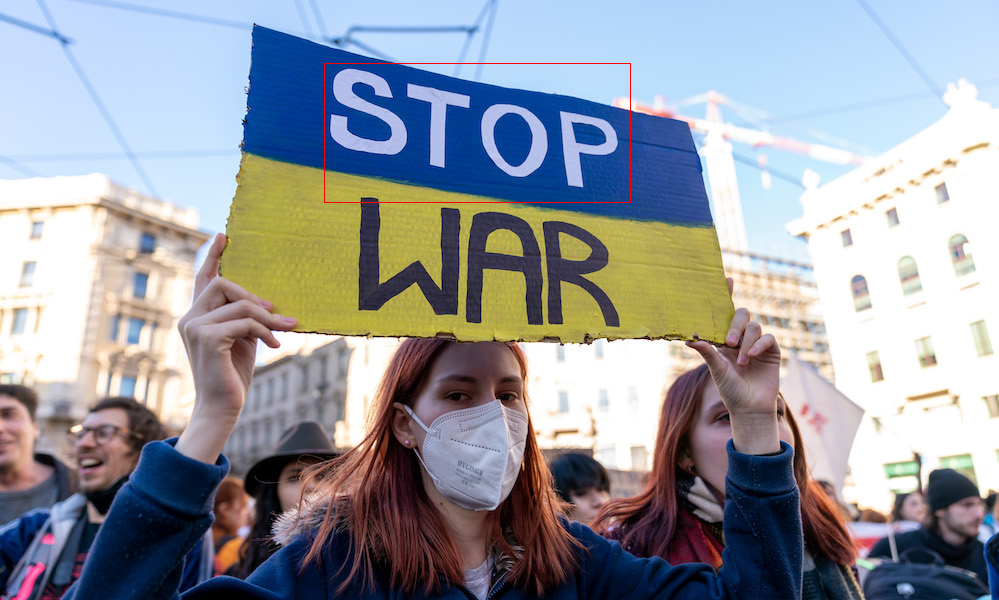

In [5]:
from rikai.types.vision import Image
image_ocr_stop = Image(image_uri) | df['mask'][0]
image_ocr_stop.to_image().to_pil()